In [2]:
# -*- coding: utf-8 -*-
import numpy as np
import pydicom
import cv2
import PIL
import matplotlib.pyplot as plt
import pandas as pd
import os
from showimage import ShowImage

# Functions

In [249]:
def remgar(image): #remove garbage
    image = image.astype(np.uint8)
    nb_components, output, stats, _ = cv2.connectedComponentsWithStats(image, connectivity = 8)
    sizes = stats[:, -1]

    max_label = 1
    max_size = sizes[1]
    for i in range(2, nb_components):
        if sizes[i] > max_size:
            max_label = i
            max_size = sizes[i]

    cleanimage = np.zeros(output.shape)
    cleanimage[output == max_label] = 255
    return cleanimage

In [337]:
def kernel(num):
    kern = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(num, num))
    return kern

In [247]:
def view(image):
    plt.imshow(image, cmap = 'gray')

In [363]:
def tophat(image, kernel):
    top_hat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
    disconnect = image - top_hat
    new_mask = remgar(disconnect)
    new_mask = np.uint8(new_mask)
    details = new_mask | top_hat
    clean = remgar(details)
    return clean

In [267]:
def close(image, num):
    kernel = np.ones((num,num),np.uint8)
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    closing = closing.astype(np.uint8)
    return closing

In [321]:
def floodfill(image):
    flood = image.copy()
    h, w = image.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
    cv2.floodFill(flood, mask, (0,0), 255);
    # Invert floodfilled image
    flood_inv = cv2.bitwise_not(flood)
    img = image | flood_inv
    return img

In [271]:
def applymask(image, mask):
    final = image.copy()
    #In a copy of the original image, clear those pixels that don't correspond to the brain
    final[mask == False] = (0,0,0)
    return final

In [278]:
path = ('D:/Uni/mri/SK_MRI/MS_dataset_full/MS/')

In [279]:
img = cv2.imread(path + '01_1/IM000013.png',3) #read img
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grayscale

# Baseline

In [376]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
#ret, markers = cv2.connectedComponents(thresh)

In [377]:
# #Get the area taken by each component. Ignore label 0 since this is the background.
# marker_area = [np.sum(markers == m) for m in range(np.max(markers)) if m != 0] 

# #Get label of largest component by area
# largest_component = np.argmax(marker_area) + 1 #Add 1 since we dropped zero above                        

# #Get pixels which correspond to the brain
# brain_mask = markers == largest_component
# #plt.imshow(brain_mask, cmap = 'gray')

In [378]:
brain_mask = remgar(thresh)
#view(brain_mask)

In [379]:
# brain_out = img.copy()
# #In a copy of the original image, clear those pixels that don't correspond to the brain
# brain_out[brain_mask == False] = (0,0,0)
# #plt.imshow(brain_out)

In [380]:
# brain_out = applymask(img, brain_mask)
# view(brain_out)

In [381]:
#kernel = np.ones((5,5),np.uint8)
# closing = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)

In [382]:
brain_mask = np.uint8(brain_mask)

closing_1 = close(brain_mask, 5)
#view(closing)
#plt.imshow(closing, cmap = 'gray')

In [383]:
# im_floodfill = closing.copy()
     
# # Mask used to flood filling.
# # Notice the size needs to be 2 pixels > than the image.
# h, w = closing.shape[:2]
# mask = np.zeros((h+2, w+2), np.uint8)
# cv2.floodFill(im_floodfill, mask, (0,0), 255);
# # Invert floodfilled image
# im_floodfill_inv = cv2.bitwise_not(im_floodfill)

In [384]:
# # Combine the two images to get the foreground.
# im_out = closing | im_floodfill_inv 
# #plt.imshow(im_out, cmap = 'gray')

In [385]:
mask_1 = floodfill(closing_1)
#view(mask_1)

In [386]:
# brain_out = img.copy()
# #In a copy of the original image, clear those pixels that don't correspond to the brain
# brain_out[im_out == False] = (0,0,0)
# #plt.imshow(brain_out, cmap = 'gray')

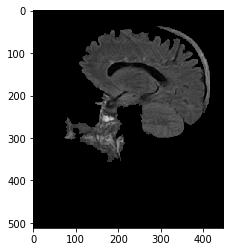

In [387]:
brain_1 = applymask(img, mask_1)
view(brain_1)

# Baseline + Tophat

In [196]:
#edgedImage = cv2.bitwise_not(brain_mask).copy()
#_, contours, _ = cv2.findContours(edgedImage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#cv2.drawContours(edgedImage,contours,-1,(255,255,255),1)
#edgedImage = cv2.bitwise_not(edgedImage)
#plt.imshow(edgedImage)

In [342]:
#kern = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10, 10))
# tophat = cv2.morphologyEx(brain_mask, cv2.MORPH_TOPHAT, kernel)
# #view(tophat)

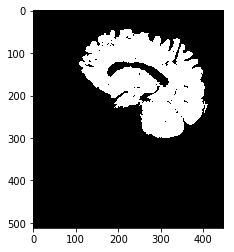

In [388]:
#ker = kernel(10)
clean = tophat(brain_mask, kernel(10))
view(clean)

In [198]:
#thresh = cv2.threshold(tophat, 200, 255, cv2.THRESH_BINARY)[1]
#thresh2 = thresh.copy()
#_, contours,_ = cv2.findContours(thresh2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#cv2.drawContours(thresh2,contours,-1,(255,255,255),1)
#plt.imshow(thresh, cmap = 'gray')

In [357]:
# disconnect = brain_mask - clean
# plt.imshow(disconnect, cmap = 'gray')

In [200]:
#nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(test, connectivity=8)
#sizes = stats[1:, -1]; nb_components = nb_components - 1
#min_size = h * w *0.08
#theone = np.zeros((test.shape))
#for i in range(0, nb_components):
#    if sizes[i] >= 1:
#        theone[test == i + 1] = 255  
#theone = theone.astype(np.uint8)
#plt.imshow(theone)

In [201]:
# ret, markers = cv2.connectedComponents(disconnect)

# marker_area = [np.sum(markers == m) for m in range(np.max(markers)) if m != 0] 

# largest_component = np.argmax(marker_area) + 1 
# new_mask = markers == largest_component
# plt.imshow(new_mask, cmap = 'gray')

In [251]:
# nb_components, output, _, _ = cv2.connectedComponentsWithStats(disconnect, connectivity=8)
   
# # Remove small objects
# new_mask = np.zeros((output.shape))
# new_mask[output == 1] = 255
    
# new_mask = new_mask.astype(np.uint8)
# plt.imshow(new_mask, cmap = 'gray')

In [365]:
# new_mask = remgar(disconnect)
# view(new_mask)

In [366]:
# details = new_mask | tophat
# plt.imshow(details, cmap = 'gray')
# details1 = details.copy()
# details1[details1 > 0] = 255
# plt.imshow(details1, cmap = 'gray')

In [204]:
# ret, markers = cv2.connectedComponents(details)
# marker_area = [np.sum(markers == m) for m in range(np.max(markers)) if m != 0] 
# largest_component = np.argmax(marker_area) + 1 
# clean = markers == largest_component
# #plt.imshow(clean, cmap = 'gray')

In [252]:
# nb_components_1, output_1, _, _ = cv2.connectedComponentsWithStats(details, connectivity=8)
   
# # Remove small objects
# clean_1 = np.zeros((output_1.shape))
# clean_1[output_1 == 1] = 255

# clean_1 = clean_1.astype(np.uint8)
# plt.imshow(clean_1, cmap = 'gray')

In [368]:
# clean_1 = remgar(details)
# view(clean_1)

In [259]:
# kernel = np.ones((5,5),np.uint8)
# closing_1 = cv2.morphologyEx(clean_1, cv2.MORPH_CLOSE, kernel)
# #plt.imshow(closing_1, cmap = 'gray')

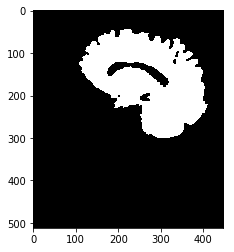

In [389]:
closing_2 = close(clean, 5)
view(closing_2)

In [390]:
closing_2 = np.uint8(closing_2)
mask_2 = floodfill(closing_2)
#view(mask_1)

In [261]:
# # Floodfill from point (0, 0)
# im_floodfill_1 = closing_1.copy()
# h, w = closing_1.shape[:2]

# mask_1 = np.zeros((h+2, w+2), np.uint8)
# cv2.floodFill(im_floodfill_1, mask_1, (0,0), 255);

# # Invert floodfilled image
# im_floodfill_inv_1 = cv2.bitwise_not(im_floodfill_1)
# #plt.imshow(im_floodfill_inv_1, cmap = 'gray')

# Combine the two images to get the foreground.
#finalmask = closing_1 | im_floodfill_inv_1

In [262]:
# finalbrain = img.copy()
# #In a copy of the original image, clear those pixels that don't correspond to the brain
# finalbrain[finalmask == False] = (0,0,0)
# #plt.imshow(finalbrain)

In [391]:
brain_2 = applymask(img, mask_2)

(Text(0.5,1,'Mask image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

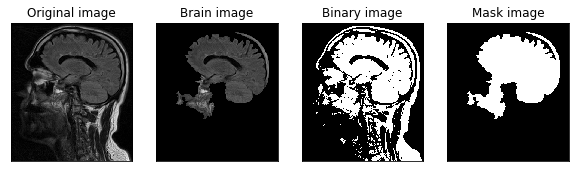

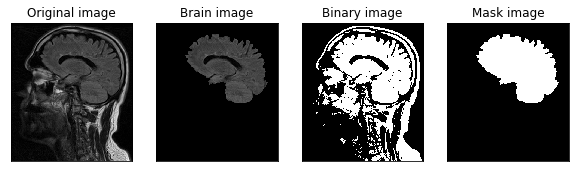

In [393]:
plt.figure(figsize=(10, 10))
plt.subplot(241),plt.imshow(img)
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(242),plt.imshow(brain_1)
plt.title('Brain image'), plt.xticks([]), plt.yticks([])
plt.subplot(243),plt.imshow(thresh,cmap = 'gray')
plt.title('Binary image'), plt.xticks([]), plt.yticks([])
plt.subplot(244),plt.imshow(mask_1, cmap = 'gray')
plt.title('Mask image'),  plt.xticks([]), plt.yticks([])

plt.figure(figsize=(10, 10))
plt.subplot(241),plt.imshow(img)
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(242),plt.imshow(brain_2)
plt.title('Brain image'), plt.xticks([]), plt.yticks([])
plt.subplot(243),plt.imshow(thresh,cmap = 'gray')
plt.title('Binary image'), plt.xticks([]), plt.yticks([])
plt.subplot(244),plt.imshow(mask_2, cmap = 'gray')
plt.title('Mask image'),  plt.xticks([]), plt.yticks([])